In [2]:
import numpy as np
import math
from IPython.display import Image

import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random

## 1. Feedforward: Building a ReLU neural network

### 1.1 Draw a network

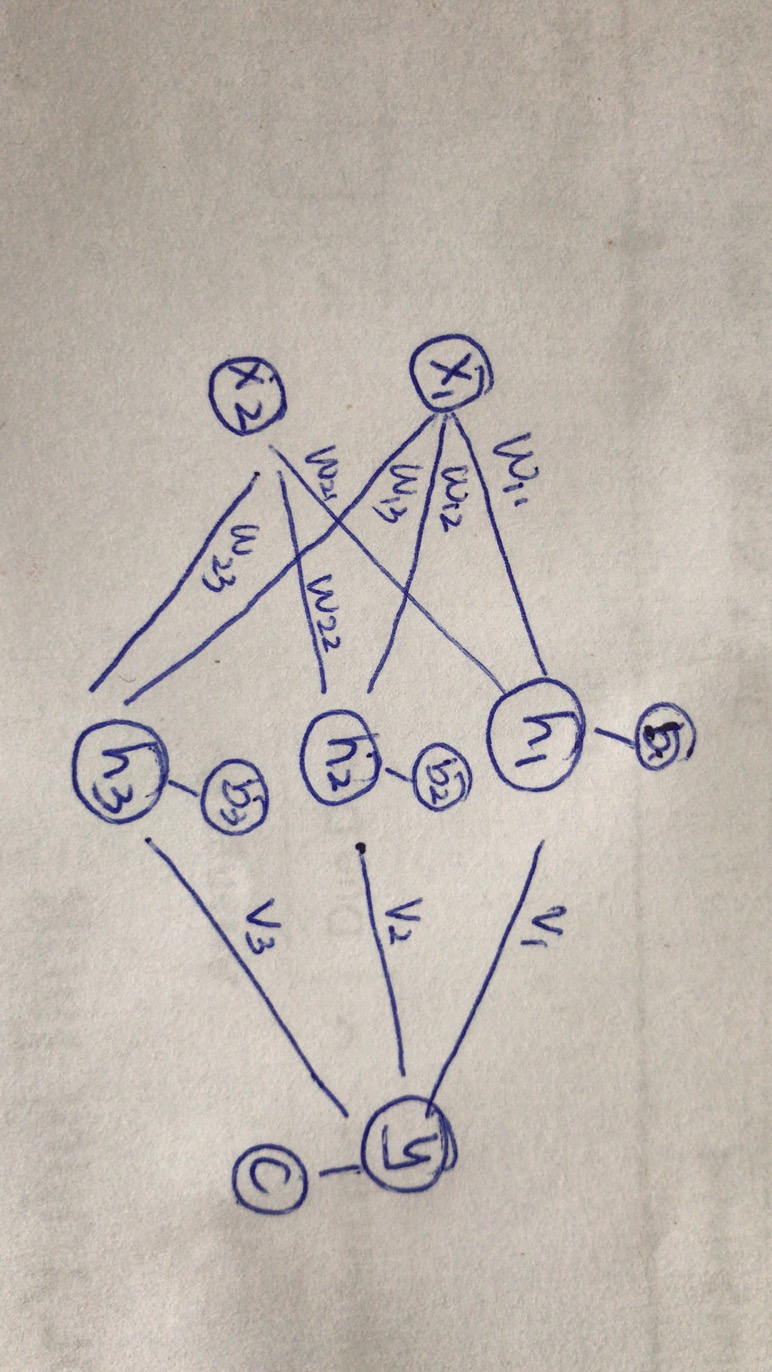

In [11]:
Image(filename="network.jpg") 

### 1.2

$\hat{y} = v_1*h_1 + v_2*h_2 + v_3*h_3 = v_1*(w_{11}*x_1 + w_{12}*x_2 +b_1) + v_2*(w_{12}*x_1 + w_{22}*x_2 +b_2)+ v_3*(w_{13}*x_1 + w_{23}*x_2 +b_3) +c$ 

### 1.3 Write out the forward-pass function in python, call it ff nn ReLu(...)

In [16]:
def ff_nn_ReLu(x):
    return max(0, x)
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))

### 1.4 what are the class probabilities associated with the forward pass of each sample?


In [5]:
X = np.array([[1,-1],[0,-1],[0,1]]) 
b = np.array([[0,0,1]])
c = 1
W = np.array([[1,-1,0],[0,0,.5]])
V = np.array([1,0,-1])

In [8]:
h_in = np.dot(X,W) + b
h_out = []
for h in h_in:
    h_out.append(np.array(list(map(ff_nn_ReLu, h))))
h_out = np.array(h_out)
y_in = np.dot(h_out,V.T) + c
y_hat = np.array(list(map(sigmoid,y_in)))

print('The probability of each 3 samples are',y_hat)

the probability of 3 samples are [0.81757448 0.62245933 0.37754067]


## 2. Gradient Descent

### 2.1 What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x} $ = $-3x^2 +100*2(y^2-x)*(-1) = -3x^2-200y^2+200x$

$\frac{\partial f}{\partial y}$ = $400y^3 - 400xy$

### 2.2 Create a visualization of the contours of the Rosenbrock function.

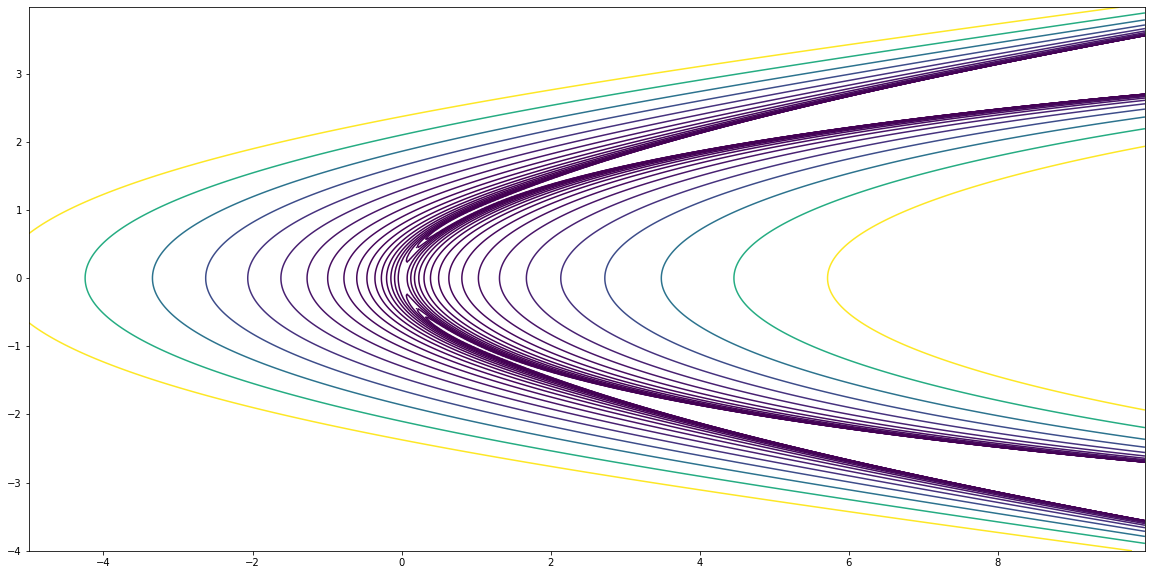

In [10]:
delta = 0.025
x = np.arange(-5,10, delta)
y = np.arange(-4,4, delta)
X, Y = np.meshgrid(x, y)
rosenbrockfunction = lambda x,y: (1-x)**3 + 100*(y**2-x)**2
Z = rosenbrockfunction(X, Y)
plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))

### 2.3 Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [12]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 200*y**2 + 200*x
    df_dy = 400*y**3 -400*x*y
    return np.array([df_dx, df_dy])
def grad_descent(iterations, learning_rate, starting_point=None):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(0,80)
        y = np.random.uniform(-2,2)
        point = np.array([x,y])
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

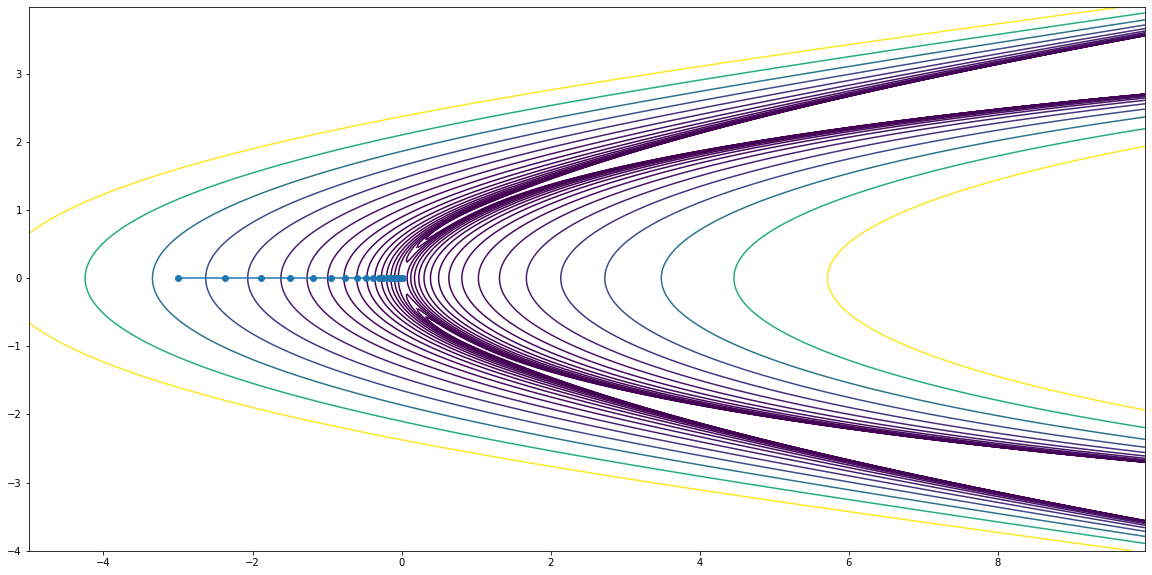

In [18]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=0.001, starting_point=[-3,0])

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

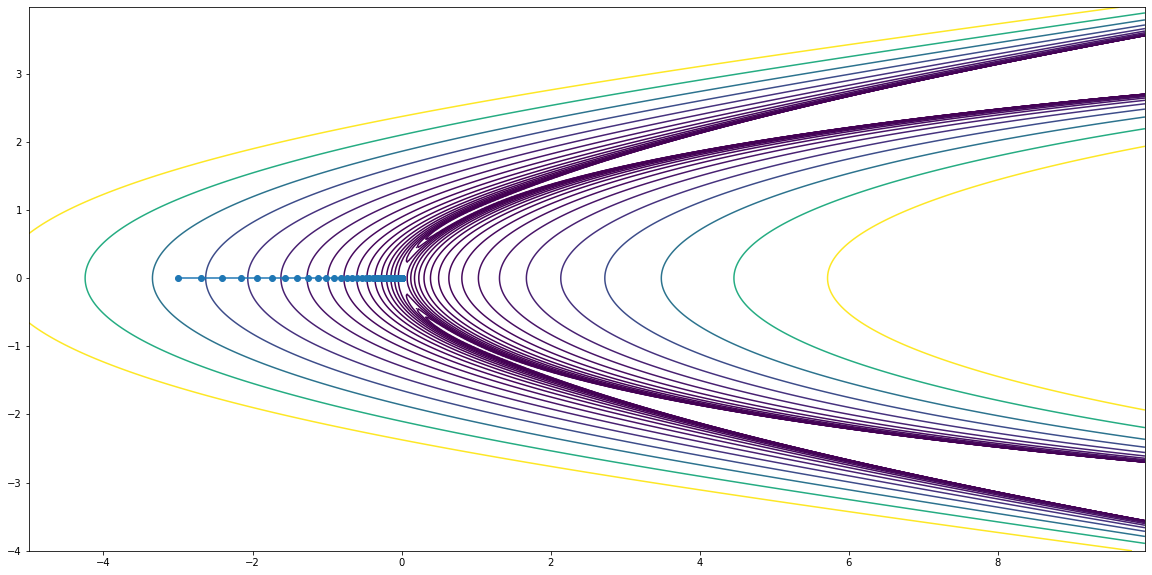

In [21]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=0.0005, starting_point=[-3,0])

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

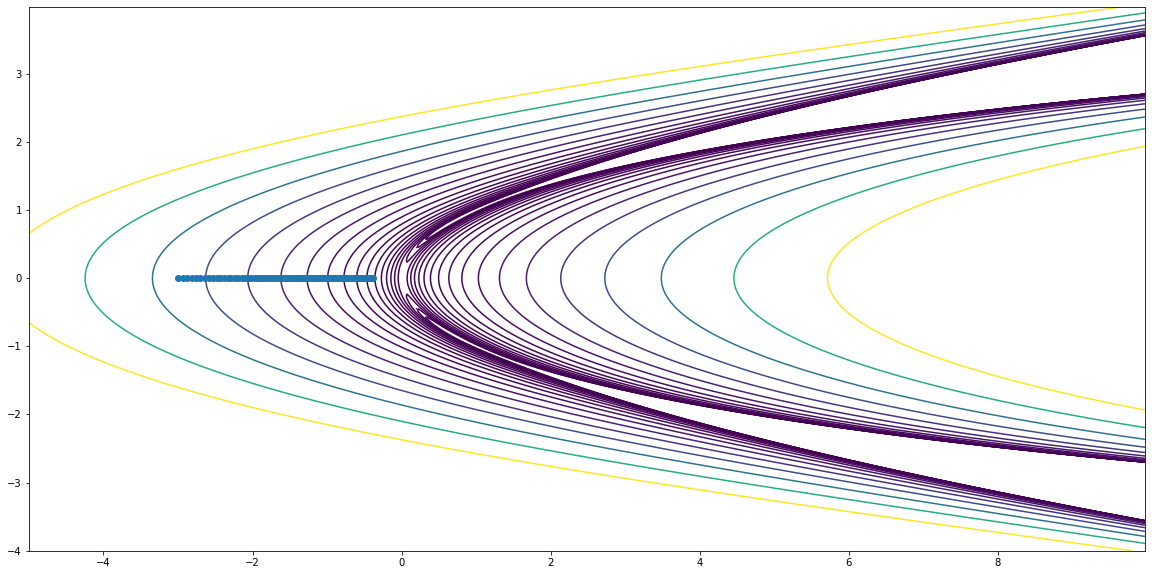

In [24]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=0.0001, starting_point=[-3,0])

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 2.4 Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters

In [26]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(0,80)
        y = np.random.uniform(-2,2)
        point = np.array([x,y])
    trajectory = [point]
    v = np.zeros(len(point))
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

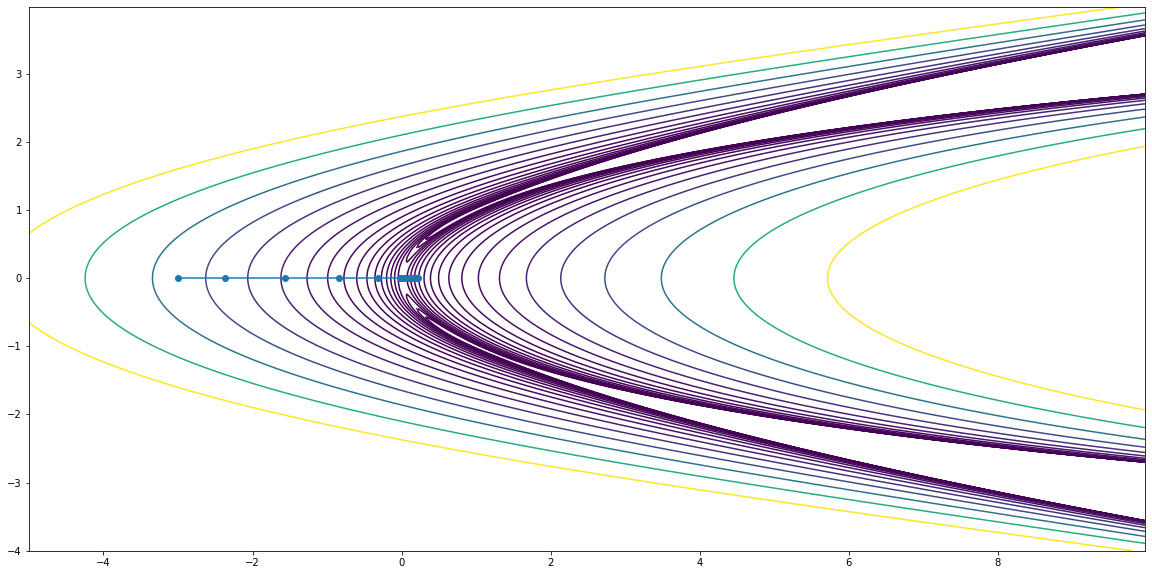

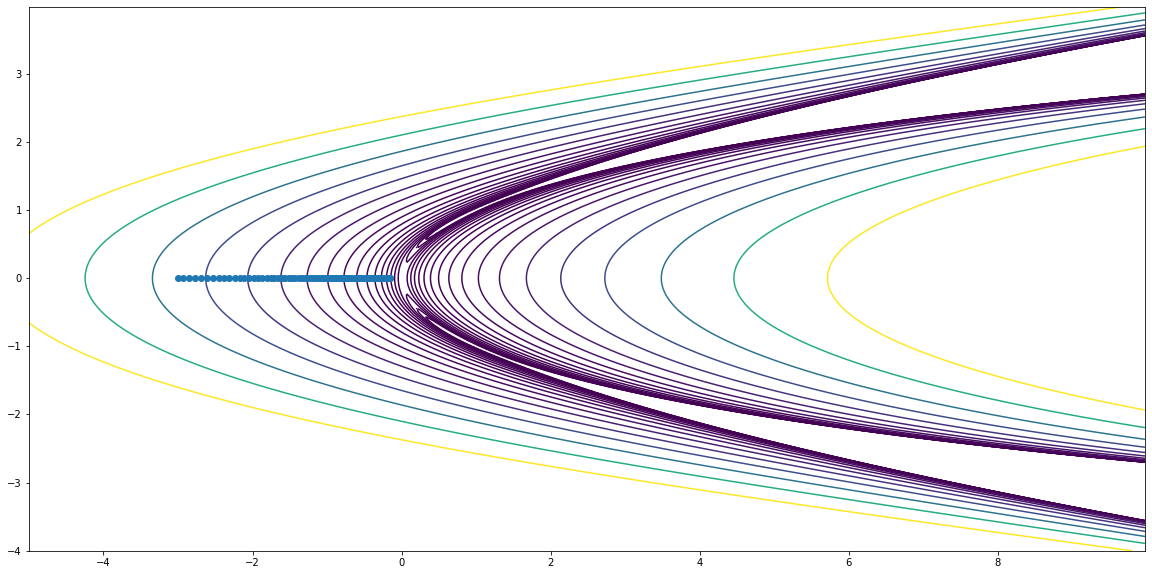

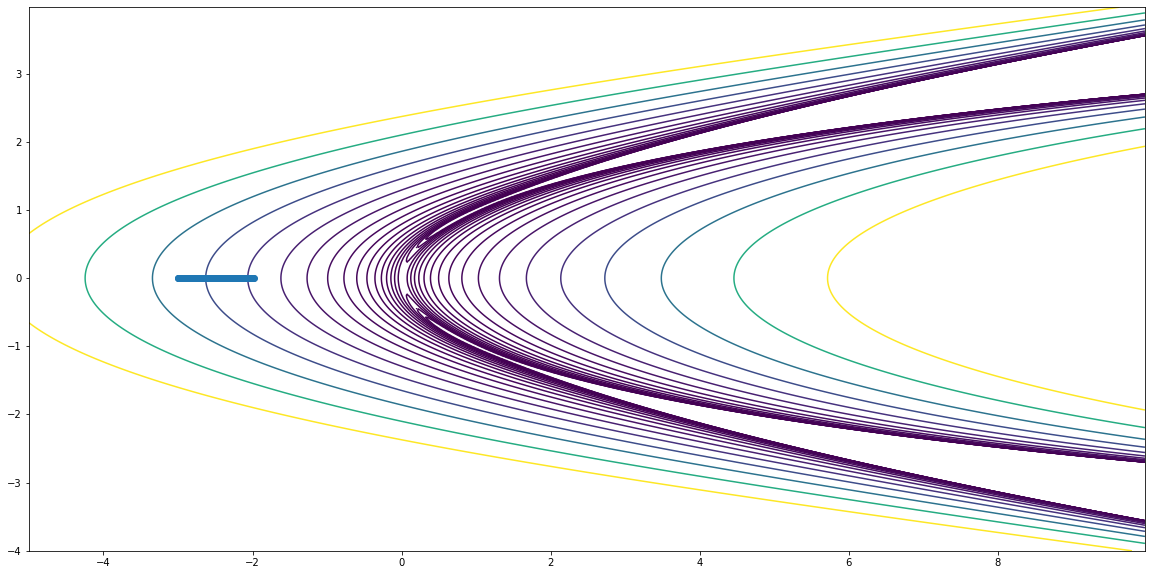

In [34]:
#epsilon=0.001, alpha=0.5
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=0.001, alpha=0.5, starting_point=[-3,0])

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#epsilon=0.0001, alpha=0.3
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=0.0001, alpha=0.3, starting_point=[-3,0])

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

#epsilon=0.00001, alpha=0.5
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=0.00001, alpha=0.5, starting_point=[-3,0])

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


## 3. Backprop

### 3.1  For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

#### For parameters $v_1, v_2, v_3$

$\frac{\partial L}{\partial v_i}$ = $\frac{\partial L}{\partial \hat{y_i}}$$\frac{\partial \hat{y_i}}{\partial v_i}$ = $-(\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}})(\hat{y_i}(1-\hat{y_i})h_i$ 

#### For parameters $w_{11}, w_{12}, w_{13}, w_{21},w_{22},w_{23}$

$\frac{\partial L}{\partial w_{ij}}$ = $\frac{\partial L}{\partial \hat{y_i}}$ $\frac{\partial \hat{y_i}}{\partial y_{out_1}}$ $\frac{\partial y_{out_1}}{\partial y_{in_1}}$ $\frac{\partial y_{in_1}}{\partial w_{ij}}$ =  $(\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}) \hat{y}(1-\hat{y})v_j \frac{\partial ReLu(out_{h_j})}{\partial h_{in}}x_i$

#### For parameters, $b_1, b_2, b_3$

$\frac{\partial L}{\partial b_i}$ =  $\frac{\partial L}{\partial \hat{y_i}}$ $\frac{\partial \hat{y_i}}{\partial out_i}$ $\frac{\partial out_i}{\partial in_i}$ $\frac{\partial in_i}{\partial b_i}$ = $(\frac{y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}) \hat{y}(1-\hat{y})v_j \frac{\partial ReLu(out_{h_j})}{\partial h_{in}}$

### 3.2  Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.


In [18]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def y_hat_fun(x,point):
    W,V,b,by = point
    h_in = np.dot(x,W) + b
    h_out = []
    for h in h_in:
        one_sample = []
        for i in h:
            one_sample.append(ff_nn_ReLu(i))
        h_out.append(one_sample)

    h_out = np.array(h_out)
    
    y_in = np.dot(h_out,V) + by
    y_hat = list(map(sigmoid, y_in))
    return y_hat

def loss(y, y_hat):
    I = np.array([1] * len(y))
    return sum(-y * np.array(list(map(math.log,y_hat))) - (I-y) * np.array(list(map(math.log,I - y_hat))))

def dL_dyhat(y,y_hat):
    I = np.array([1] * len(y))
    return y/y_hat - ((I-y)/(I-y_hat))

def Relu_derivative(x):
    if x > 0:
        return 1
    else:
        return 0

In [19]:
def grad_f(point,vector_x):
    W,V,b,by = point
    yhat = y_hat_fun(vector_x,point)
    
    x1,x2 = vector_x[:,0], vector_x[:,1]
    v1,v2,v3 = V
    h_in = np.dot(x,W) + b
    h = []
    for hs in h_in:
        one_sample = []
        for i in hs:
            one_sample.append(ff_nn_ReLu(i))
        h.append(one_sample)

    h = np.array(h)
    
    inh1,inh2,inh3 = h_in[:,0], h_in[:,1], h_in[:,2]
    h1, h2, h3 = h[:,0], h[:,1], h[:,2]
    
    I = np.array([1] * len(y))
    dL_dv1 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*h1)
    dL_dv2 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*h2)
    dL_dv3 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*h3)
    dL_dby = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat))
    
    dL_dw11 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v1*np.array(list(map(Relu_derivative, inh1)))*x1)
    dL_dw12 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v2*np.array(list(map(Relu_derivative, inh2)))*x1)
    dL_dw13 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v3*np.array(list(map(Relu_derivative, inh3)))*x1)
    dL_dw21 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v1*np.array(list(map(Relu_derivative, inh1)))*x2)
    dL_dw22 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v2*np.array(list(map(Relu_derivative, inh2)))*x2)
    dL_dw23 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v3*np.array(list(map(Relu_derivative, inh3)))*x2)
    dL_db1 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v1*np.array(list(map(Relu_derivative, inh1))))
    dL_db2 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v2*np.array(list(map(Relu_derivative, inh2))))
    dL_db3 = -np.average(dL_dyhat(y,yhat)*yhat*(I-yhat)*v3*np.array(list(map(Relu_derivative, inh3))))
    
    dL_dw = np.array([[dL_dw11,dL_dw12,dL_dw13],[dL_dw21,dL_dw22,dL_dw23]])
    dL_dv = np.array([dL_dv1,dL_dv2,dL_dv3])
    dL_db = np.array([dL_db1,dL_db2,dL_db3])

    return np.array([dL_dw, dL_dv, dL_db, dL_dby])

In [20]:
def grad_descent(vector_x,y,starting_point=None, iterations=10, learning_rate=1e-2):
    x1, x2 = vector_x[:,0], vector_x[:,1]
    if len(starting_point)>0:
        point = starting_point
    else:
        starting_w = np.random.uniform(-.1,.1,size=6).astype("float128")
        starting_v = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_b = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_by = np.random.uniform(-.1,.1,size=1).astype("float128")
        point = np.array([starting_w,starting_v,starting_b,starting_by])
        
    trajectory = [point] 
    losses = [loss(y, y_hat_fun(vector_x, point))]
    
    for i in range(iterations):
        grad = grad_f(point, vector_x)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, y_hat_fun(vector_x,point)))
    return (np.array(trajectory), losses)

### 3.3 Generate a synthetic dataset like the XOR pattern (see below).

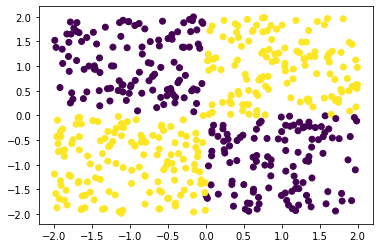

In [25]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

### 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

Text(0.5, 0, 'Iteration')

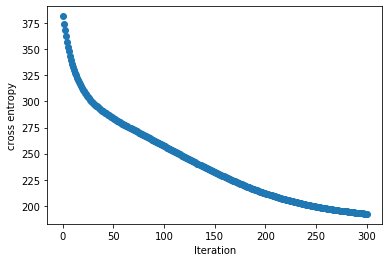

In [34]:
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1,0,-1])
by = [1]
b = np.array([0,0,1])

point = np.array([W,V,b,by])
traj, losses = grad_descent(x, y, starting_point = point, iterations=300,learning_rate=0.1)
plt.plot(losses,'o')
plt.ylabel("cross entropy")
plt.xlabel("Iteration")

### 3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

Text(0.5, 0, 'Iteration')

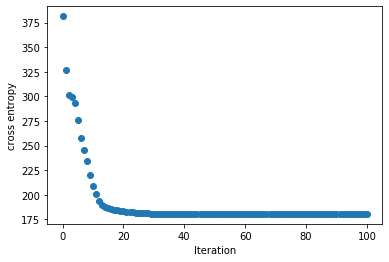

In [37]:
def grad_descent_momentum(vector_x, y,iterations=300, epsilon=0.05, alpha=0.1, starting_point=point):
    x1, x2 = vector_x[:,0], vector_x[:,1]
    if len(starting_point)>0:
        point = starting_point
    else:
        starting_w = np.random.uniform(-.1,.1,size=6).astype("float128")
        starting_v = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_b = np.random.uniform(-.1,.1,size=3).astype("float128")
        starting_by = np.random.uniform(-.1,.1,size=1).astype("float128")
        point = np.array([starting_w,starting_v,starting_b,starting_by])
        
    trajectory = [point] 
    losses = [loss(y, y_hat_fun(vector_x, point))]
    v = 0.0 * grad_f(point, vector_x)
    
    for i in range(iterations):
        grad = grad_f(point, vector_x)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, y_hat_fun(vector_x,point)))
    return (np.array(trajectory), losses)


W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1,0,-1])
by = [1]
b = np.array([0,0,1])

point = np.array([W,V,b,by])
traj, losses = grad_descent_momentum(x,y,iterations=100, epsilon=1, alpha=0.7, starting_point=point)
plt.plot(losses,'o')
plt.ylabel("cross entropy")
plt.xlabel("Iteration")

### 3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


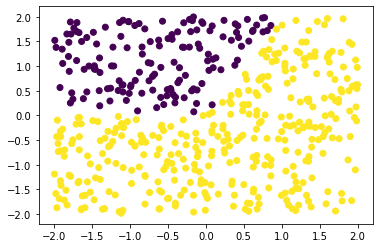

In [38]:
y_hat_pred = np.array(y_hat_fun(x,point))
y_hat_pred[y_hat_pred > 0.5] = 1
y_hat_pred[y_hat_pred < 0.5] = 0
plt.scatter(x[:,0],x[:,1],c=y_hat_pred)